# House Price Prediction


# Importing libraries

In [483]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Importing Data 

In [484]:
data=pd.read_csv('Boston.csv')      #Making dataframe

X=data.iloc[:,1:-1].values

Y=data.iloc[:,-1:].values

print(X.shape)
print(Y.shape)

(506, 13)
(506, 1)


# Feature scaling/normalization: (Z-score Normalisation)¶

In [485]:
NX = preprocessing.scale(X)

# Splitting data into training and testing data

In [486]:
X_train,X_test,Y_train,Y_test=train_test_split(NX,Y,test_size=0.1)

IX_train=np.append(arr=np.ones((len(X_train),1)),values=X_train,axis=1)    #Adding column of 1 to the matrix
IX_test=np.append(arr=np.ones((len(X_test),1)),values=X_test,axis=1)    #Adding column of 1 to the matrix

In [487]:
def alpha_function(A,e):
    value=np.dot(A.T,A)
    value=np.linalg.norm(value)
    value=value+e
    value=1.0/value
    return value

# Training the model (Batch GDM)

In [488]:
epsilon=10**(-8)
tol=10**(-8)
maxiter=100000


def train_model(IX_train,Y_train,epsilon,Tol,maxiter,new_alpha=None):
    
    theta=np.ones((14, 1))
    
    for i in range(maxiter):
        gradient=np.dot(Y_train.T,IX_train) - np.dot(theta.T,np.dot(IX_train.T,IX_train)+epsilon*np.array([[1]]))
        if np.all((gradient == 0)):
            break
        old = theta
        alpha = alpha_function(IX_train, epsilon)
        if new_alpha!= None:
            if i==0:
                theta=theta+new_alpha*(gradient.T)
                continue
        theta=theta+alpha*(gradient.T)
        if np.linalg.norm(theta-old)<Tol:
            break
  
    return theta,alpha

# Computed Solution

In [489]:
theta,alpha=train_model(IX_train,Y_train,epsilon,tol,maxiter)
print(theta)

[[22.65994918]
 [-0.8947256 ]
 [ 1.05129138]
 [ 0.18567435]
 [ 0.80028319]
 [-2.11084624]
 [ 2.64283524]
 [ 0.10006532]
 [-3.05676686]
 [ 2.87283313]
 [-2.20962635]
 [-2.07824705]
 [ 0.86963593]
 [-3.80890447]]


# Computation of Theta using normal equation

In [490]:
epsilon=10**(-8)
B = np.dot(IX_train.T,IX_train)
[m, m] = B.shape
Theta = np.linalg.solve(B + epsilon*np.eye(m), np.dot(IX_train.T,Y_train)) 
Theta

array([[22.65994918],
       [-0.89472565],
       [ 1.05129147],
       [ 0.18567466],
       [ 0.80028315],
       [-2.11084628],
       [ 2.6428352 ],
       [ 0.10006537],
       [-3.05676682],
       [ 2.87283384],
       [-2.20962718],
       [-2.07824707],
       [ 0.86963594],
       [-3.80890451]])

### Calculating norm(Theta-theta) where 'theta' is obtained by using (batch) gradient descent method.


In [491]:
np.linalg.norm(Theta-theta)

1.1403440726226013e-06

# Gradient descent by changing the alpha

In [492]:
new_alpha=alpha+(4*(10**(-4)))
new_theta,new_alpha=train_model(IX_train,Y_train,epsilon,tol,maxiter,new_alpha)
print(new_theta)

[[22.65994918]
 [-0.8947256 ]
 [ 1.05129138]
 [ 0.18567435]
 [ 0.80028319]
 [-2.11084624]
 [ 2.64283524]
 [ 0.10006532]
 [-3.05676686]
 [ 2.87283313]
 [-2.20962635]
 [-2.07824705]
 [ 0.86963593]
 [-3.80890447]]


In [493]:
print(np.linalg.norm(new_theta-theta))

2.4963640413482846e-09


# Testing the Model

In [494]:
Predicted_Y_test=np.dot(IX_test,theta)

# Plotting the data

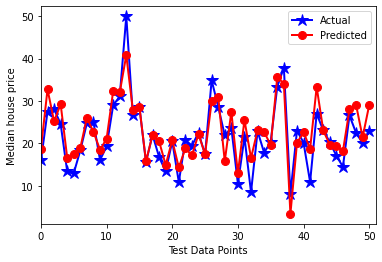

In [495]:
plt.plot(Y_test, '-*', color='blue',
         markersize=12, linewidth=2,
         markerfacecolor='blue',
         markeredgecolor='blue',
         markeredgewidth=1)
plt.plot(Predicted_Y_test, '-o', color='red',
         markersize=8, linewidth=2,
         markerfacecolor='red',
         markeredgecolor='red',
         markeredgewidth=1)
plt.xlim([ 0, len(Y_test)])
plt.xlabel("Test Data Points")
plt.ylabel("Median house price")
plt.legend({'Actual','Predicted'})